In [1]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=ee37925a74823e76b7ca67e8cc49557bd10bd43a46b81a76256547abcee4be2b
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [2]:
!pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 95.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.5/263.5 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB

In [4]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/AmazonReviews.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
# load python libraries
import numpy as np
import pandas as pd
import re
import os
from bs4 import BeautifulSoup     # pulls data out of XML and HTML files
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

import wget
import nltk

In [6]:
import tensorflow as tf
from transformers import TFAutoModel, AutoTokenizer

In [7]:
from sklearn.utils.class_weight import compute_class_weight
from simpletransformers.classification import ClassificationModel

In [8]:
data = pd.read_csv("AmazonReviews.csv")

In [9]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labr...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with ..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The fl...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


In [10]:
# see how many entries there are
print(data['Text'].shape)

(568454,)


In [11]:
# Display some of the data
data[['Score','Text','Summary']].sample(5)

,Score,Text,Summary
526429,5,"love this cereal, even in the summer. I add brown sugar for sweetness. The right size for handling. It comes in five boxes and is shipped in a green plastic for easy shipping",proud pup
294894,5,"I tried chocolate and am normally not a vanilla person but since the taste and quality was exceptional, I figured I'd give it a try. This drink is simply incredible. They pack so much organic nu...",Perfect Post Workout Shake!! Delicious! High Protein!
28535,5,"I enjoy the taste of the water, my family and neighbors that have tried it also like the water.<br />It it's worth it and it has an interesting story.",Good water
527806,5,I was recently diagnosed as diabetic. I am allowed these chips in moderation. They taste fantastic and in moderation are actually good for you too!,Best Chips EVER
218463,5,nom nom nom. Oreos are just delicious at every age. Eating these just brings back so many fond memories of my childhood. They make a good snacking food in the afternoon or even in the morning. Jus...,Just who does not like oreos


In [12]:
# Remove any duplicate entries in the data
data.drop_duplicates(subset=['Text'],inplace=True)
data.dropna(axis=0,inplace=True)

In [13]:
data.shape

(393565, 10)

In [14]:
data['Score'].value_counts()

5    250709
4     56042
1     36272
3     29752
2     20790
Name: Score, dtype: int64

In [15]:
labels = data['Score']
labels[labels<4] = 0
labels[labels>1] = 1

In [16]:
labels.value_counts()

1    306751
0     86814
Name: Score, dtype: int64

In [17]:
# map words to colloquial terms
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [18]:
import nltk
nltk.download('stopwords')  # donload the stopwords library for use by NLTK
stop_words = set(stopwords.words('english'))

# create a function to clean the text.  Remove whiteapce, html characters, punctuation etc...
def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=3:                  #removing short word
            long_words.append(i)
    return (" ".join(long_words)).strip()

# store the cleaned text in a list
cleaned_text = []
for t in data['Text']:
    cleaned_text.append(text_cleaner(t))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
# create a function to clean the summary text
def summary_cleaner(text):
    newString = re.sub('"','', text)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    newString = newString.lower()
    tokens=newString.split()
    newString=''
    for i in tokens:
        if len(i)>1:
            newString=newString+i+' '
    return newString

# Call the summary_cleaner function and store the cleaned summaries in a list
cleaned_summary = []
for t in data['Summary']:
    cleaned_summary.append(summary_cleaner(t))

# store the cleaned text and summaries in a dictionary
data['cleaned_text']=cleaned_text
data['cleaned_summary']=cleaned_summary
data['cleaned_summary'].replace('', np.nan, inplace=True)
# drop rows with null values
data.dropna(axis=0,inplace=True)

In [20]:
# add the text _START_ and _END_ to the summaries to easily identify they are the summaries
data['cleaned_summary'] = data['cleaned_summary'].apply(lambda x : '_START_ '+ x + ' _END_')

In [21]:
for i in range(5):
    print("Review:",data['cleaned_text'][i])
    print("Summary:",data['cleaned_summary'][i])
    print("Score:",data['Score'][i])
    print("\n")

Review: bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better
Summary: _START_ good quality dog food  _END_
Score: 1


Review: product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo
Summary: _START_ not as advertised  _END_
Score: 0


Review: confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch
Summary: _START_ delight says it all  _END_
Score: 1


Review: looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal
Summary: _START_ cough medicine  _END_
Score: 0


Review: great taffy great price wide assortment

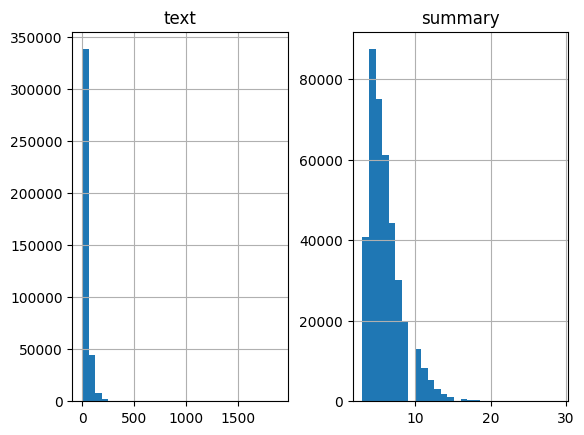

In [22]:
# investigate the distribution of the length of the text in the data
# to help fix the max length of the sequence
import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in data['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in data['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 30)
plt.show()

In [59]:
max_len_text = 80
max_len_summary = 10

# split the data into train and test sets
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(data['cleaned_text'],data['Score'],test_size=0.1,random_state=0,shuffle=True)

In [60]:
x_tr.shape

(353899,)

In [61]:
new_train = pd.DataFrame()
new_train['text'] = x_tr
new_train['labels'] = y_tr

new_train = new_train.sample(30000, random_state=100)

In [62]:
# Tokenize the data
model_name = "roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [63]:
# Function to tokenize the Sentences
def tokenize_texts(texts):
  return tokenizer(texts.tolist(), padding=True, truncation=True, max_length=100, return_tensors="tf")

In [66]:
# Function to covert data into TensorFlow Datasets
def convert_to_tf_dataset(x, y):
    dataset = tf.data.Dataset.from_tensor_slices((tokenize_texts(x), y))
    return dataset.map(lambda x, y: ({'input_ids': x['input_ids'], 'attention_mask': x['attention_mask']}, y))

In [67]:
BATCH_SIZE = 32
train_dataset = convert_to_tf_dataset(new_train['text'], new_train['labels']).batch(BATCH_SIZE).shuffle(1000)
val_dataset = convert_to_tf_dataset(x_val, y_val).batch(BATCH_SIZE)

In [68]:
len(train_dataset), len(val_dataset)

(938, 1229)

In [ ]:
class BERTForBinaryClassification(tf.keras.Model):
    def __init__(self, bert_model, dropout_rate=0.1):
        super().__init__()
        self.bert = bert_model
        self.dropout1 = tf.keras.layers.Dropout(dropout_rate)
        # First additional dense layer with L2 regularization
        self.dense1 = tf.keras.layers.Dense(512, activation='relu')
        self.batch_norm1 = tf.keras.layers.BatchNormalization()
        self.dropout2 = tf.keras.layers.Dropout(dropout_rate)
        # Second additional dense layer
        self.dense2 = tf.keras.layers.Dense(128, activation='relu')
        self.batch_norm2 = tf.keras.layers.BatchNormalization()
        self.dropout3 = tf.keras.layers.Dropout(dropout_rate)
        # Final dense layer for binary classification
        self.classifier = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        x = self.bert(inputs)[1]  # Get pooled output
        x = self.dropout1(x)
        x = self.dense1(x)
        x = self.batch_norm1(x)  # Apply batch normalization
        x = self.dropout2(x)
        x = self.dense2(x)
        x = self.batch_norm2(x)  # Apply batch normalization
        x = self.dropout3(x)
        return self.classifier(x)

In [104]:
class BERTForBinaryClassification(tf.keras.Model):
    def __init__(self, bert_model):
        super().__init__()
        self.bert = bert_model
        # self.batch_norm1 = tf.keras.layers.BatchNormalization()
        self.dropout1 = tf.keras.layers.Dropout(0.5)

        # For binary classification, num_classes=1 with sigmoid activation
        self.fc = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        x = self.bert(inputs)[1]
        # x = self.batch_norm1(x)
        x = self.dropout1(x)
        return self.fc(x)

In [105]:
model = TFAutoModel.from_pretrained(model_name)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['roberta.embeddings.position_ids', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

In [106]:
classifier = BERTForBinaryClassification(model)

In [107]:
classifier.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [108]:
history = classifier.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=2
)

Epoch 1/2
938/938 [==============================] - 299s 266ms/step - loss: 0.3052 - accuracy: 0.8717 - val_loss: 0.2698 - val_accuracy: 0.8873
Epoch 2/2
938/938 [==============================] - 221s 236ms/step - loss: 0.1871 - accuracy: 0.9269 - val_loss: 0.2759 - val_accuracy: 0.8970


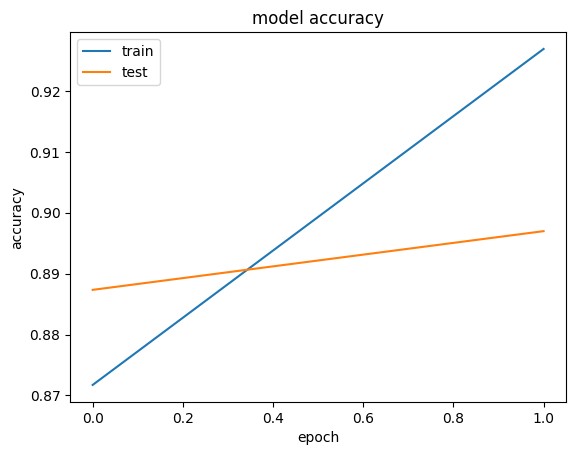

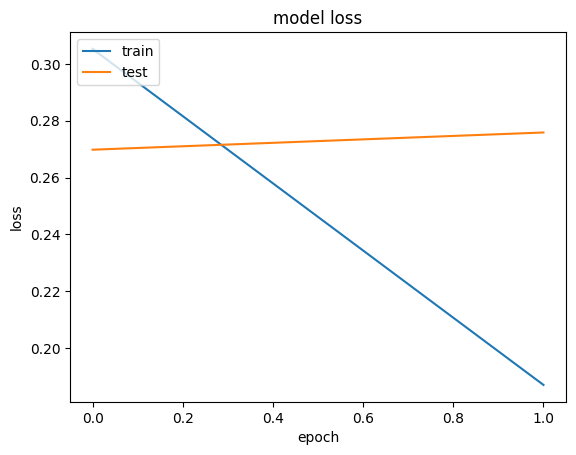

In [109]:
# summarize the history for accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()